# Primary vs. planted forest
----
>#### Definition 

>>#### **Primary forest**
>>>“Naturally regenerated forest of native species, where there are no clearly visible indications of human activities and the ecological processes are not significantly disturbed.”

>>#### **Naturally regenerated forest**
>>>“Naturally regenerated forest where there are clearly visible indications of human activities. Includes selectively logged-over areas, areas regenerating following agricultural land use, areas recovering from human-induced fires, etc.”

>>#### **Planted forest**
>>>“Forest predominantly composed of trees established through planting and/or deliberate seeding.”

######  -- defined by the UN Food and Agriculture Organization (FAO)

In [86]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [87]:
df = pd.read_csv('forest-area-primary-planted.csv')
df

,Entity,Code,Year,Planted Forest | 00006716 || Area | 005110 || thousand hectares,Naturally regenerating forest | 00006717 || Area | 005110 || thousand hectares,Primary Forest | 00006714 || Area | 005110 || thousand hectares
0,Afghanistan,AFG,1990,0.0,1.208440e+06,0.0
1,Afghanistan,AFG,1991,0.0,1.208440e+06,0.0
2,Afghanistan,AFG,1992,0.0,1.208440e+06,0.0
3,Afghanistan,AFG,1993,0.0,1.208440e+06,0.0
4,Afghanistan,AFG,1994,0.0,1.208440e+06,0.0
...,...,...,...,...,...,...
7859,Zimbabwe,ZWE,2015,108000.0,1.756693e+07,801000.0
7860,Zimbabwe,ZWE,2016,108000.0,1.752086e+07,801000.0
7861,Zimbabwe,ZWE,2017,108000.0,1.747479e+07,801000.0
7862,Zimbabwe,ZWE,2018,108000.0,1.742872e+07,NaN


In [88]:
df.rename(columns = {'Planted Forest | 00006716 || Area | 005110 || thousand hectares': 'Planted Forest/thousand hectares',
                    'Naturally regenerating forest | 00006717 || Area | 005110 || thousand hectares': 'Naturally regenerating forest/thousand hectares',
                    'Primary Forest | 00006714 || Area | 005110 || thousand hectares': 'Primary Forest/thousand hectares'}, inplace = True)

df

,Entity,Code,Year,Planted Forest/thousand hectares,Naturally regenerating forest/thousand hectares,Primary Forest/thousand hectares
0,Afghanistan,AFG,1990,0.0,1.208440e+06,0.0
1,Afghanistan,AFG,1991,0.0,1.208440e+06,0.0
2,Afghanistan,AFG,1992,0.0,1.208440e+06,0.0
3,Afghanistan,AFG,1993,0.0,1.208440e+06,0.0
4,Afghanistan,AFG,1994,0.0,1.208440e+06,0.0
...,...,...,...,...,...,...
7859,Zimbabwe,ZWE,2015,108000.0,1.756693e+07,801000.0
7860,Zimbabwe,ZWE,2016,108000.0,1.752086e+07,801000.0
7861,Zimbabwe,ZWE,2017,108000.0,1.747479e+07,801000.0
7862,Zimbabwe,ZWE,2018,108000.0,1.742872e+07,NaN


In [89]:
df[df['Code'].isna()]['Entity'].unique()

array(['Africa (FAO)', 'Americas (FAO)', 'Asia (FAO)',
       'Belgium-Luxembourg (FAO)', 'Caribbean (FAO)',
       'Central America (FAO)', 'Central Asia (FAO)', 'China (FAO)',
       'Eastern Africa (FAO)', 'Eastern Asia (FAO)',
       'Eastern Europe (FAO)', 'Europe (FAO)',
       'European Union (27) (FAO)', 'European Union (28) (FAO)',
       'Land Locked Developing Countries (FAO)',
       'Least Developed Countries (FAO)',
       'Low Income Food Deficit Countries (FAO)', 'Micronesia (FAO)',
       'Middle Africa (FAO)',
       'Net Food Importing Developing Countries (FAO)',
       'Northern Africa (FAO)', 'Northern America (FAO)',
       'Northern Europe (FAO)', 'Oceania (FAO)', 'Saint Barthlemy',
       'Small Island Developing States (FAO)', 'South America (FAO)',
       'South-eastern Asia (FAO)', 'Southern Africa (FAO)',
       'Southern Asia (FAO)', 'Southern Europe (FAO)', 'Sudan (former)',
       'Western Africa (FAO)', 'Western Asia (FAO)',
       'Western Europe (FAO)

In [90]:
continents = ['Africa (FAO)', 'Asia (FAO)', 'Europe (FAO)', 'Oceania (FAO)', 'South America (FAO)', 'Northern America (FAO)']
cont_df = df[df['Entity'].isin(continents)]
cont_df.head()

,Entity,Code,Year,Planted Forest/thousand hectares,Naturally regenerating forest/thousand hectares,Primary Forest/thousand hectares
30,Africa (FAO),NaN,1990,8.500240e+06,734301062.5,1.512216e+08
31,Africa (FAO),NaN,1991,8.542301e+06,730983750.0,1.505661e+08
32,Africa (FAO),NaN,1992,8.584362e+06,727666437.5,1.499105e+08
33,Africa (FAO),NaN,1993,8.626423e+06,724349125.0,1.492550e+08
34,Africa (FAO),NaN,1994,8.668484e+06,721031812.5,1.485995e+08


In [91]:
world_df = df[df['Entity'] == 'World']
world_df.head()

,Entity,Code,Year,Planted Forest/thousand hectares,Naturally regenerating forest/thousand hectares,Primary Forest/thousand hectares
7742,World,OWID_WRL,1990,1.787189e+08,4.051780e+09,1.312936e+09
7743,World,OWID_WRL,1991,1.830328e+08,4.044585e+09,1.311506e+09
7744,World,OWID_WRL,1992,1.870929e+08,4.032657e+09,1.310076e+09
7745,World,OWID_WRL,1993,1.911530e+08,4.020728e+09,1.308645e+09
7746,World,OWID_WRL,1994,1.952131e+08,4.008800e+09,1.307215e+09


In [92]:
print(cont_df['Year'].max(), world_df['Year'].max())

2019 2019


#

### Comparison

In [93]:
cont2019_df = cont_df[cont_df['Year'] == 2019]

cont_labels = list(cont2019_df['Entity'].apply(lambda x : x.replace('(FAO)', '')))

planted_Forest = list(cont2019_df['Planted Forest/thousand hectares'].round(1))
natural_Forest = list(cont2019_df['Naturally regenerating forest/thousand hectares'].round(1))

# Primary_forest data only updated till 2017 
primary_Forest = list(cont_df[cont_df['Year'] == 2017]['Primary Forest/thousand hectares'].round(1))

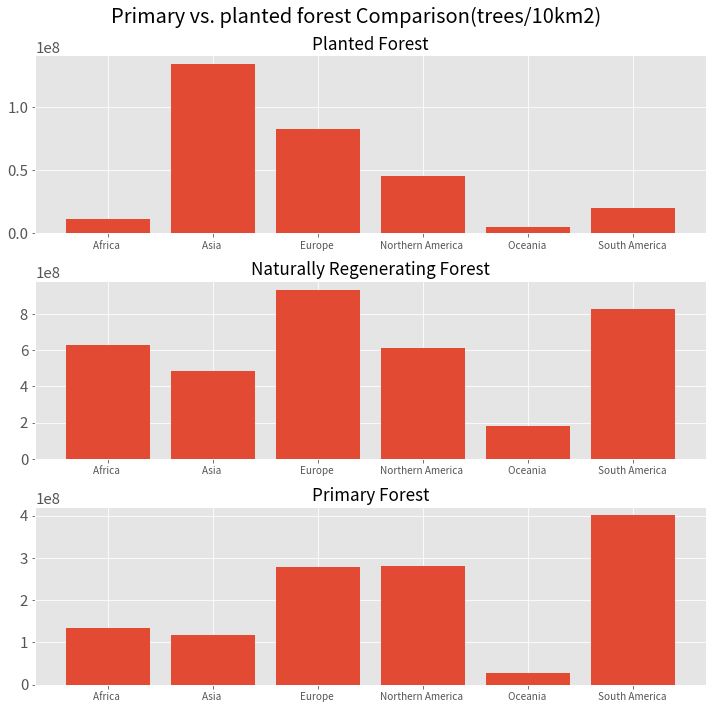

In [94]:
plt.style.use('ggplot')
plt.rc('ytick', labelsize=15)
plt.rc('xtick', labelsize=10)

x = cont_labels
y = planted_Forest

plt.figure(figsize=(10, 10))

plt.subplot(3, 1, 1)
plt.bar(x,y)
plt.title("Planted Forest", fontsize = 17)

x = cont_labels
y = natural_Forest

plt.subplot(3, 1, 2)
plt.bar(x,y)
plt.title("Naturally Regenerating Forest", fontsize = 17)

x = cont_labels
y = primary_Forest

plt.subplot(3, 1, 3)
plt.bar(x,y)
plt.title("Primary Forest", fontsize = 17)

plt.suptitle("Primary vs. planted forest Comparison(trees/10km2)", fontsize = 20)
plt.tight_layout()


#

### Forest area by type: primary vs. planted, World

In [95]:
world_df.tail()

,Entity,Code,Year,Planted Forest/thousand hectares,Naturally regenerating forest/thousand hectares,Primary Forest/thousand hectares
7767,World,OWID_WRL,2015,2.897155e+08,3.792302e+09,1.277217e+09
7768,World,OWID_WRL,2016,2.921972e+08,3.786534e+09,1.277217e+09
7769,World,OWID_WRL,2017,2.938798e+08,3.777982e+09,1.277217e+09
7770,World,OWID_WRL,2018,2.965005e+08,3.770515e+09,NaN
7771,World,OWID_WRL,2019,2.990039e+08,3.762919e+09,NaN


In [96]:
w_planted_Forest = list(world_df['Planted Forest/thousand hectares'].round(2)[:-2])
w_natural_Forest = list(world_df['Naturally regenerating forest/thousand hectares'].round(2)[:-2])
w_primary_Forest = list(world_df['Primary Forest/thousand hectares'].round(2)[:-2])
w_year = list(world_df['Year'].round(2)[:-2])


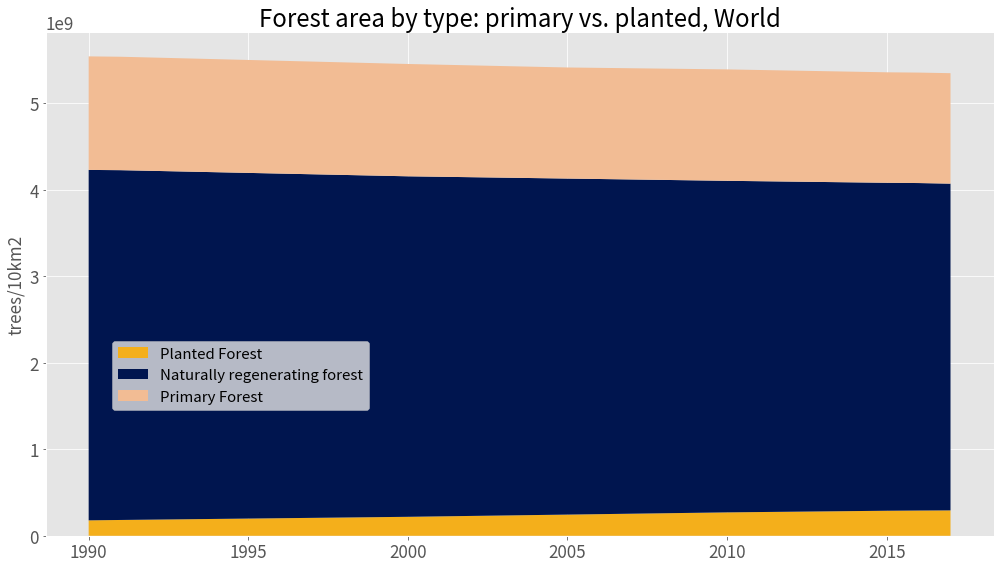

In [97]:
plt.style.use('ggplot')
plt.figure(figsize=(14,8))
plt.rc('ytick', labelsize=17)
plt.rc('xtick', labelsize=17)


labels = ['Planted Forest', 'Naturally regenerating forest', 'Primary Forest']
colors = ['#f4af1b', '#00154f', '#f2bc94']

plt.stackplot(w_year, w_planted_Forest, w_natural_Forest, w_primary_Forest, labels = labels, colors = colors)


plt.legend(loc = (0.07,0.25), fontsize = 15)

plt.ylabel('trees/10km2', fontsize = 17)
plt.title("Forest area by type: primary vs. planted, World", fontsize = 24)
plt.tight_layout()
plt.show()

#

#### Data export

In [98]:
altered_cont_df = cont_df.copy()
altered_cont_df['Entity'] = cont_df['Entity'].apply(lambda x : x.replace('(FAO)', ''))
altered_cont_df

altered_cont2019_df = cont2019_df.copy()
altered_cont2019_df['Entity'] = cont2019_df['Entity'].apply(lambda x : x.replace('(FAO)', ''))
altered_cont2019_df

,Entity,Code,Year,Planted Forest/thousand hectares,Naturally regenerating forest/thousand hectares,Primary Forest/thousand hectares
59,Africa,NaN,2019,1.129668e+07,629311875.0,NaN
413,Asia,NaN,2019,1.340131e+08,487086875.0,NaN
2302,Europe,NaN,2019,8.254724e+07,933616687.5,NaN
5155,Northern America,NaN,2019,4.525745e+07,611504062.5,NaN
5274,Oceania,NaN,2019,4.785390e+06,179975312.5,NaN
6483,South America,NaN,2019,1.978489e+07,826525625.0,NaN


In [99]:
# Primary_forest data only updated till 2017 
altered_primary2017_df = cont_df[cont_df['Year'] == 2017].copy()
altered_primary2017_df['Entity'] = altered_primary2017_df['Entity'].apply(lambda x : x.replace('(FAO)', ''))
altered_primary2017_df


,Entity,Code,Year,Planted Forest/thousand hectares,Naturally regenerating forest/thousand hectares,Primary Forest/thousand hectares
57,Africa,NaN,2017,1.113623e+07,6.374128e+08,1.350481e+08
411,Asia,NaN,2017,1.315728e+08,4.869939e+08,1.172812e+08
2300,Europe,NaN,2017,8.215626e+07,9.335821e+08,2.776162e+08
5153,Northern America,NaN,2017,4.440312e+07,6.124324e+08,2.812240e+08
5272,Oceania,NaN,2017,4.775660e+06,1.800390e+08,2.685972e+07
6481,South America,NaN,2017,1.856288e+07,8.320526e+08,4.004571e+08


In [100]:
altered_cont_df.to_excel('converted_data/continents.xlsx')
altered_cont2019_df.to_excel('converted_data/continents2019.xlsx')
altered_primary2017_df.to_excel('converted_data/primary2017.xlsx')
world_df.to_excel('converted_data/worldtill2017.xlsx')